In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
def show_images(dataloader):
    inputs, labels = next(iter(dataloader))
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        img = inputs[i]
        ax.imshow(img)
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis("off")
    plt.show()

dict_keys(['train_0.005', 'train_0.01', 'train_0.02', 'train_0.05', 'train_0.10', 'train_0.20', 'test'])


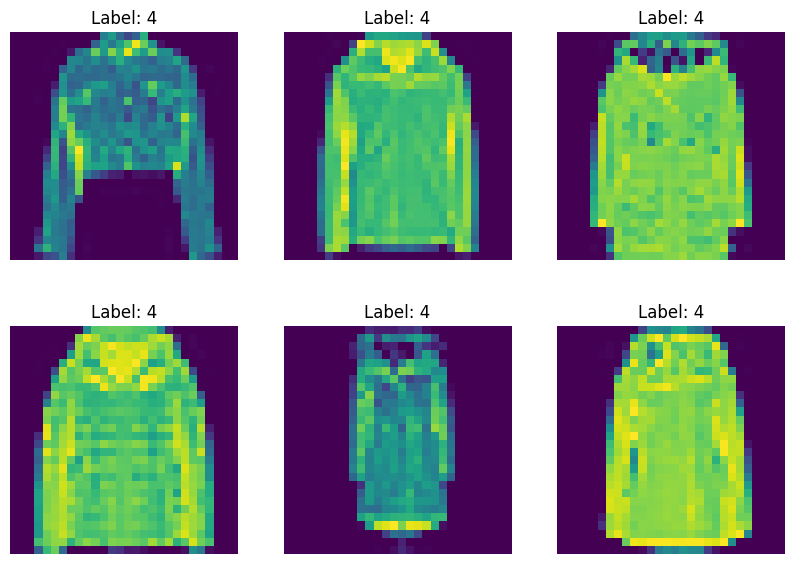

In [10]:
import pickle
file_name = "/Users/max/MasterThesisData/Binary_FashionMNIST_DataLoaders.pkl"
with open(file_name, "rb") as f:
    Binary_FashionMNIST = pickle.load(f)

print(Binary_FashionMNIST.keys())
train_data_0005 = Binary_FashionMNIST["train_0.005"]
show_images(train_data_0005)

In [11]:
import torch
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
import random
random.seed(42)
from sklearn import svm
from sklearn.preprocessing import StandardScaler
train_data_0005 = Binary_FashionMNIST["train_0.005"]
train_data_001 = Binary_FashionMNIST["train_0.01"]
train_data_002 = Binary_FashionMNIST["train_0.02"]
train_data_005 = Binary_FashionMNIST["train_0.05"]
train_data_010 = Binary_FashionMNIST["train_0.10"]
train_data_020 = Binary_FashionMNIST["train_0.20"]
test_data = Binary_FashionMNIST["test"]

### 0.5\%

In [12]:
Train_DataLoader = train_data_0005 # 0.005 0.5%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.005")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# labels = np.unique(y_train)
# print("Labels:", labels)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)


import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.005
3 is negative, 4 is positive
Train_label3: 30
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6030, 784)
y_train.shape: (6030,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 1000
FP: 424
FN: 0
TN: 576
Accuracy: 0.7880
Misclassification rate: 0.2120
Sensitivity (Recall): 1.0000
Specificity: 0.5760
Precision: 0.7022
Negative Predictive Value: 1.0000
G-mean: 0.7589
F-measure: 0.8251
Discriminant Power: Infinity
F2-measure: 0.7467
InvF0.5-measure: 0.9218
AGF: 0.8297
Balanced Accuracy: 0.7880
Matthew's Correlation Coefficient: 0.6360
Cohen's Kappa: 0.5760
Youden's Index: 0.5760
Positive Likelihood Ratio: 2.3585
Negative Likelihood Ratio: 0.0000
None


### 1%

In [13]:
Train_DataLoader = train_data_001 # 0.01 1%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.01")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.01
3 is negative, 4 is positive
Train_label3: 60
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6060, 784)
y_train.shape: (6060,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 999
FP: 347
FN: 1
TN: 653
Accuracy: 0.8260
Misclassification rate: 0.1740
Sensitivity (Recall): 0.9990
Specificity: 0.6530
Precision: 0.7422
Negative Predictive Value: 0.9985
G-mean: 0.8077
F-measure: 0.8517
Discriminant Power: 4.1565
F2-measure: 0.7824
InvF0.5-measure: 0.9343
AGF: 0.8550
Balanced Accuracy: 0.8260
Matthew's Correlation Coefficient: 0.6949
Cohen's Kappa: 0.6520
Youden's Index: 0.6520
Positive Likelihood Ratio: 2.8790
Negative Likelihood Ratio: 0.0015
None


### 2%

In [14]:
Train_DataLoader = train_data_002 # 0.02 2%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.02")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.02
3 is negative, 4 is positive
Train_label3: 120
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6120, 784)
y_train.shape: (6120,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 996
FP: 313
FN: 4
TN: 687
Accuracy: 0.8415
Misclassification rate: 0.1585
Sensitivity (Recall): 0.9960
Specificity: 0.6870
Precision: 0.7609
Negative Predictive Value: 0.9942
G-mean: 0.8272
F-measure: 0.8627
Discriminant Power: 3.4753
F2-measure: 0.7986
InvF0.5-measure: 0.9380
AGF: 0.8655
Balanced Accuracy: 0.8415
Matthew's Correlation Coefficient: 0.7181
Cohen's Kappa: 0.6830
Youden's Index: 0.6830
Positive Likelihood Ratio: 3.1821
Negative Likelihood Ratio: 0.0058
None


### 5%

In [15]:
Train_DataLoader = train_data_005 # 0.05 5%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.05")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.05
3 is negative, 4 is positive
Train_label3: 300
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6300, 784)
y_train.shape: (6300,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 986
FP: 226
FN: 14
TN: 774
Accuracy: 0.8800
Misclassification rate: 0.1200
Sensitivity (Recall): 0.9860
Specificity: 0.7740
Precision: 0.8135
Negative Predictive Value: 0.9822
G-mean: 0.8736
F-measure: 0.8915
Discriminant Power: 3.0244
F2-measure: 0.8430
InvF0.5-measure: 0.9459
AGF: 0.8930
Balanced Accuracy: 0.8800
Matthew's Correlation Coefficient: 0.7777
Cohen's Kappa: 0.7600
Youden's Index: 0.7600
Positive Likelihood Ratio: 4.3628
Negative Likelihood Ratio: 0.0181
None


### 10%

In [16]:
Train_DataLoader = train_data_010 # 0.1 10%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.10")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.10
3 is negative, 4 is positive
Train_label3: 600
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6600, 784)
y_train.shape: (6600,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 974
FP: 170
FN: 26
TN: 830
Accuracy: 0.9020
Misclassification rate: 0.0980
Sensitivity (Recall): 0.9740
Specificity: 0.8300
Precision: 0.8514
Negative Predictive Value: 0.9696
G-mean: 0.8991
F-measure: 0.9086
Discriminant Power: 2.8718
F2-measure: 0.8734
InvF0.5-measure: 0.9467
AGF: 0.9093
Balanced Accuracy: 0.9020
Matthew's Correlation Coefficient: 0.8125
Cohen's Kappa: 0.8040
Youden's Index: 0.8040
Positive Likelihood Ratio: 5.7294
Negative Likelihood Ratio: 0.0313
None


### 20%

In [17]:
Train_DataLoader = train_data_020 # 0.2 20%
Test_DataLoader = test_data
print("Dataset: Binary_FashionMNIST")
print("Imbalanced Ratio: 0.20")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_FashionMNIST
Imbalanced Ratio: 0.20
3 is negative, 4 is positive
Train_label3: 1200
Train_label4: 6000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (7200, 784)
y_train.shape: (7200,)
X_test.shape: (2000, 784)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 969
FP: 153
FN: 31
TN: 847
Accuracy: 0.9080
Misclassification rate: 0.0920
Sensitivity (Recall): 0.9690
Specificity: 0.8470
Precision: 0.8636
Negative Predictive Value: 0.9647
G-mean: 0.9059
F-measure: 0.9133
Discriminant Power: 2.8413
F2-measure: 0.8828
InvF0.5-measure: 0.9459
AGF: 0.9138
Balanced Accuracy: 0.9080
Matthew's Correlation Coefficient: 0.8221
Cohen's Kappa: 0.8160
Youden's Index: 0.8160
Positive Likelihood Ratio: 6.3333
Negative Likelihood Ratio: 0.0366
None
